# Bitcoin price movement prediction project 

Loading initial libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from functools import reduce

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Bitcoin_Final_Project.csv')
df.head()

,Date,Bitcoin_Open,Bitcoin_High,Bitcoin_Low,Bitcoin_Close,Bitcoin_Adj_Close,Bitcoin_Volume,Bitcoin_Daily_Change,Price_Increase,Volatility_Open,...,Gold_Close,Gold_Adj_Close,Gold_Volume,10year_Open,10year_High,10year_Low,10year_Close,10year_Adj_Close,10year_Volume,Google_Search_Volume
0,3/17/2016,417.889008,420.997009,417.889008,420.621002,420.621002,83528600.0,2.731994,1,15.34,...,1264.500000,1264.500000,27,1.864,1.910,1.864,1.903,1.903,0,0
1,3/18/2016,420.546997,420.546997,406.136993,409.548004,409.548004,104940000.0,-10.998993,0,14.05,...,1253.800049,1253.800049,542,1.889,1.896,1.866,1.871,1.871,0,0
2,3/19/2016,409.265015,410.984009,407.230011,410.444000,410.444000,58423000.0,1.178985,1,0.00,...,0.000000,0.000000,0,0.000,0.000,0.000,0.000,0.000,0,12538673
3,3/20/2016,410.401001,414.625000,410.401001,413.755005,413.755005,45947900.0,3.354004,1,0.00,...,0.000000,0.000000,0,0.000,0.000,0.000,0.000,0.000,0,0
4,3/21/2016,413.417999,413.417999,410.381012,413.307007,413.307007,61655400.0,-0.110992,0,14.57,...,1243.800049,1243.800049,1061,1.887,1.924,1.887,1.923,1.923,0,0


In [9]:
# examine class distribution
print(df.Price_Increase.value_counts(), '\n')
posrt = (df.Price_Increase.sum()/len(df.index)).round(4)
print('proportion in positive class:', posrt)
print('baseline accuracy:', 1-posrt)


1    1019
0     807
Name: Price_Increase, dtype: int64

In [4]:
print("Baseline is 55.8%")

Baseline is 55.8%


# Correlation and Data Visualization 
We want to explore correaltion and visualize the best variables for our model

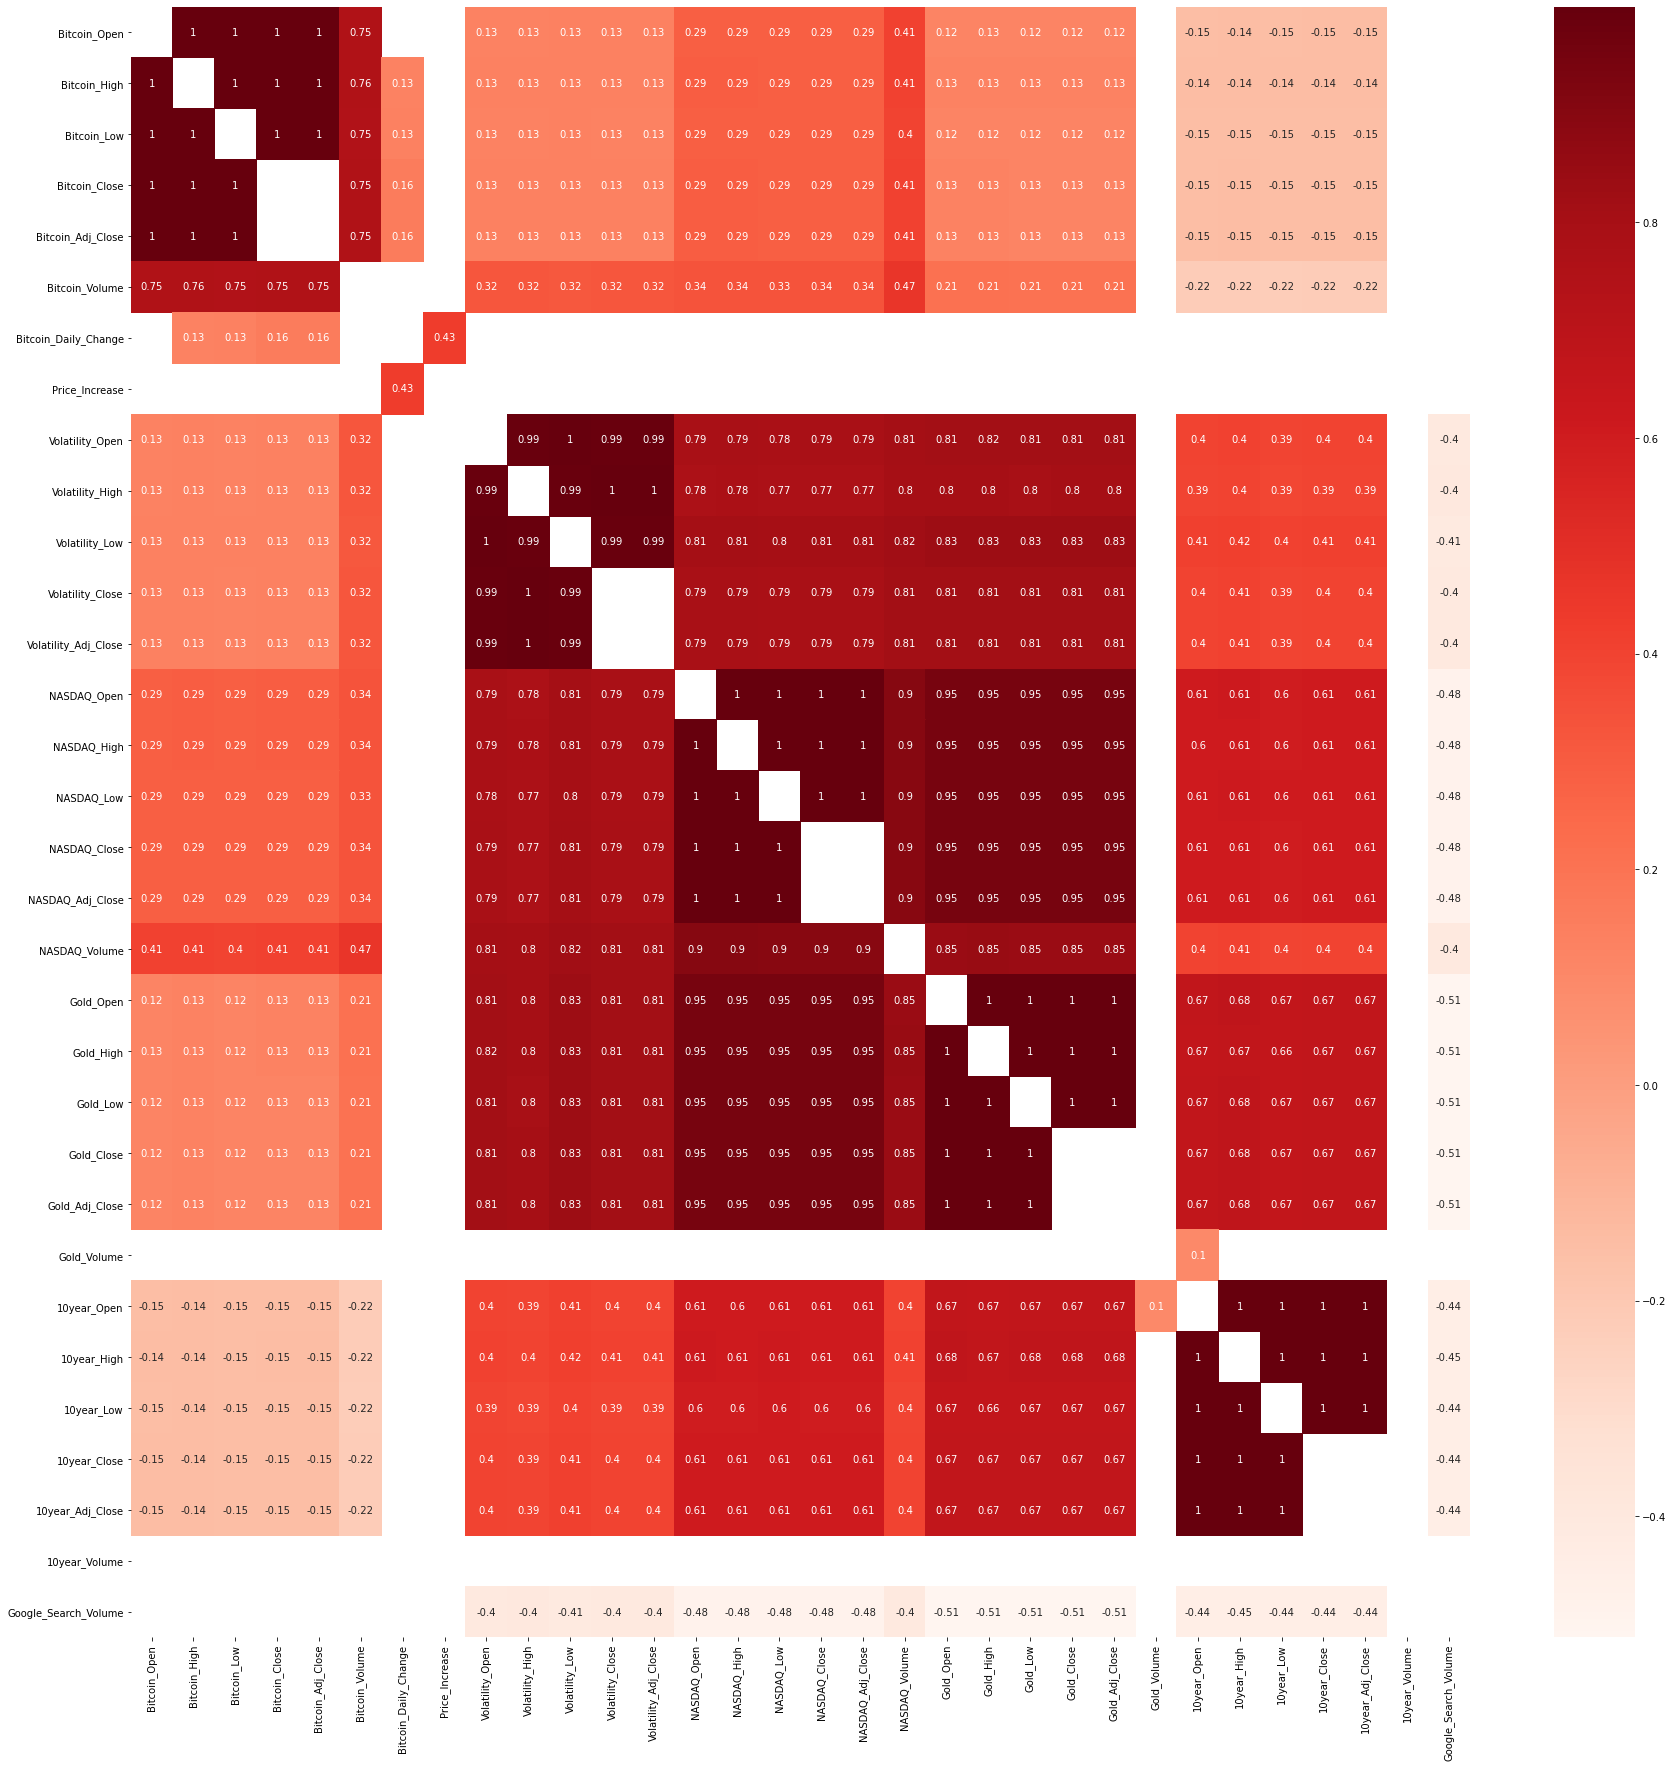

In [5]:
# heatmap of correlations
dfCorr = df.corr()
filteredDf = dfCorr[(abs(dfCorr) >= .1) & (dfCorr !=1.000)]
plt.figure(figsize=(30,30))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [6]:
df.corr()[['Price_Increase']].sort_values(by=['Price_Increase'], ascending = False).head(10)

,Price_Increase
Price_Increase,1.000000
Bitcoin_Daily_Change,0.431588
Google_Search_Volume,0.043245
Volatility_Open,0.011017
Volatility_Low,0.003287
Volatility_High,0.002988
Bitcoin_Adj_Close,0.002956
Bitcoin_Close,0.002956
NASDAQ_Volume,0.002159
Gold_Volume,-0.003120


<AxesSubplot:xlabel='NASDAQ_Volume', ylabel='Density'>

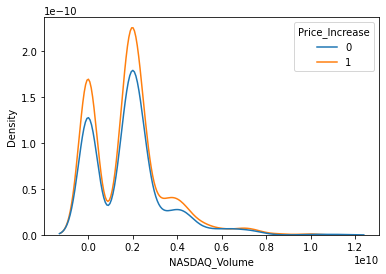

In [7]:
sns.kdeplot(data=df, x='NASDAQ_Volume', hue='Price_Increase')

<AxesSubplot:xlabel='10year_Close', ylabel='Density'>

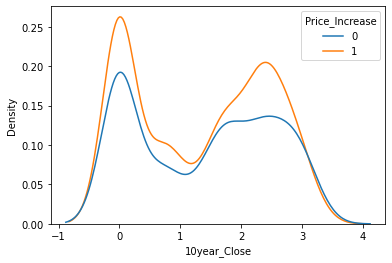

In [8]:
sns.kdeplot(data=df, x='10year_Close', hue='Price_Increase')

<AxesSubplot:xlabel='Volatility_Open', ylabel='Density'>

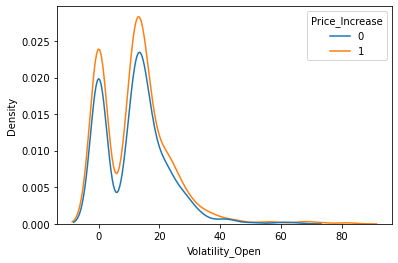

In [9]:
sns.kdeplot(data=df, x='Volatility_Open', hue='Price_Increase')

<AxesSubplot:xlabel='Gold_Low', ylabel='Density'>

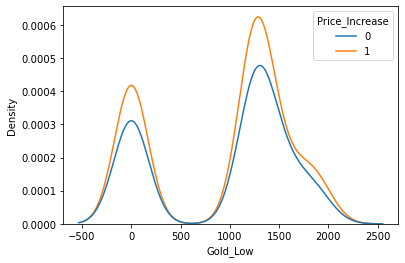

In [7]:
sns.kdeplot(data=df, x='Gold_Low', hue='Price_Increase')

<AxesSubplot:xlabel='Price_Increase'>

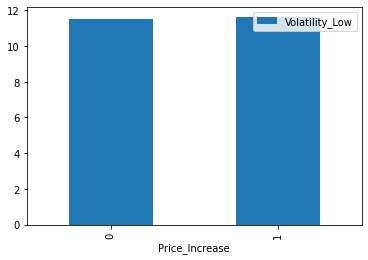

In [10]:
# grouped visualization
df.groupby(by='Price_Increase').mean().plot.bar(y='Volatility_Low')

<AxesSubplot:xlabel='Price_Increase'>

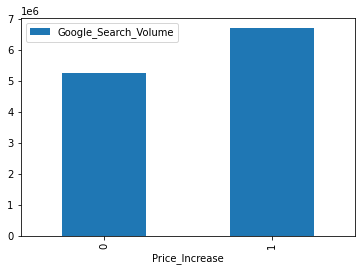

In [11]:
# grouped visualization
df.groupby(by='Price_Increase').mean().plot.bar(y='Google_Search_Volume')

<AxesSubplot:xlabel='Price_Increase'>

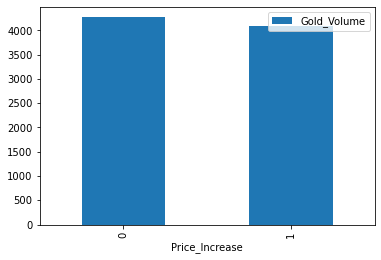

In [12]:
# grouped visualization
df.groupby(by='Price_Increase').mean().plot.bar(y='Gold_Volume')

<AxesSubplot:xlabel='Price_Increase'>

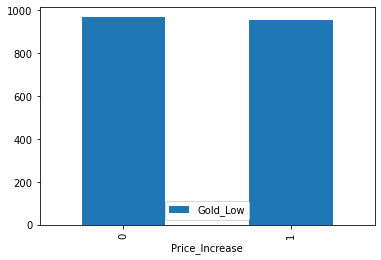

In [6]:
# grouped visualization
df.groupby(by='Price_Increase').mean().plot.bar(y='Gold_Low')

# Decision Trees

We want to find the best features with the best magnitute to predicting Bitcoin price increase 

In [7]:
#import the basic tree model from the sci-kit learn package, as well as a plotting package
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [8]:
cols = df.columns.to_list()
print(len(cols), 'columns:', cols)

33 columns: ['Date', 'Bitcoin_Open', 'Bitcoin_High', 'Bitcoin_Low', 'Bitcoin_Close', 'Bitcoin_Adj_Close', 'Bitcoin_Volume', 'Bitcoin_Daily_Change', 'Price_Increase', 'Volatility_Open', 'Volatility_High', 'Volatility_Low', 'Volatility_Close', 'Volatility_Adj_Close', 'NASDAQ_Open', 'NASDAQ_High', 'NASDAQ_Low', 'NASDAQ_Close', 'NASDAQ_Adj_Close', 'NASDAQ_Volume', 'Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adj_Close', 'Gold_Volume', '10year_Open', '10year_High', '10year_Low', '10year_Close', '10year_Adj_Close', '10year_Volume', 'Google_Search_Volume']


In [11]:
# split out your target feature and your other features that you will use to predict the target
xcols = df.columns[9:len(df.columns)].to_list()
X, y = df[xcols], df[['Price_Increase']]
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (1826, 24) 
y shape: (1826, 1)


In [12]:
#fit the decision tree and output accuracy
clf = DecisionTreeClassifier(criterion='entropy').fit(X, y)
print('Accuracy of Decision Tree classifier: {:.2f}'
     .format(clf.score(X, y)))

Accuracy of Decision Tree classifier: 0.92


In [13]:
importance = clf.feature_importances_
scores = {}
for i,v in enumerate(importance):
    #print('Feature: %s, Score: %.5f' % (xcols[i],v))
    scores[xcols[i]] = v

#reverse sort 'scores' dictionary by values
import operator
sorted_scores = sorted(scores.items(), key=operator.itemgetter(1),reverse=True)

#print top 10 features
for feature, score in sorted_scores[0:10]:
    print(feature, ':', score)

Google_Search_Volume : 0.1691383289649962
NASDAQ_Volume : 0.08641965048067006
Gold_Low : 0.07014513695334103
10year_Open : 0.053898482545454034
Gold_Open : 0.05359449550545989
Gold_Volume : 0.053230369538808026
Gold_High : 0.046684439934009975
10year_Low : 0.04492750205531737
Volatility_High : 0.04266262291726081
NASDAQ_Open : 0.0410478179907508


<ipython-input-14-972171b3d3fe>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = top_feats, rotation=90)


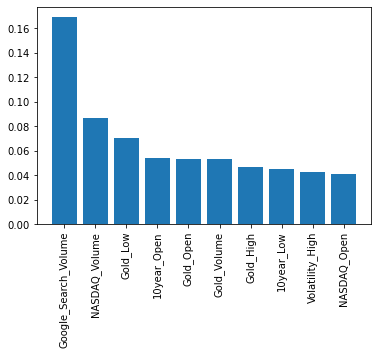

In [14]:
# first extract the top ten features into two lists that can be passed to plotting function
top_feats, top_vals = [], []
for feat_name, value in sorted_scores[0 : 10]:
    top_feats.append(feat_name)
    top_vals.append(value)

# plot feature importance for top 10 features
# plotting function
fig, ax = plt.subplots(1, 1)
feats_plot = ax.bar(top_feats, top_vals)
ax.set_xticklabels(labels = top_feats, rotation=90)
plt.show()

In [15]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[xcols], df[['Price_Increase']], 
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape,'\n')

clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

print('Accuracy of classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))

(1369, 24)
(457, 24) 

Accuracy of classifier on training set: 0.92
Accuracy of classifier on test set: 0.57


Accuracy of classifier on training set: 0.56
Accuracy of classifier on test set: 0.59

you can see the constrained tree depth


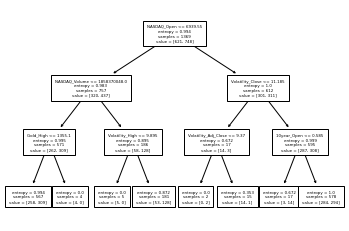

In [16]:
# limit tree complexity
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)

print('Accuracy of classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))

plot_tree(clf, feature_names=xcols, fontsize=4)
print('\nyou can see the constrained tree depth')

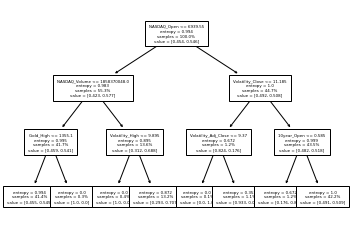

In [17]:
#examine proportions to get probabilities
f = plt.figure()
plot_tree(clf, feature_names=xcols, fontsize=4, proportion=True)
f.savefig("decision_tree_depth3.pdf", bbox_inches='tight')

In [18]:
# let's work w/ a simpler set of features to look at prediction
xcols2 = ['Google_Search_Volume', 'NASDAQ_Volume','Gold_Low']
X2 = df[xcols2]
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X2, y)
print('Accuracy of Decision Tree classifier: {:.2f}'
     .format(clf.score(X2, y)))

Accuracy of Decision Tree classifier: 0.57


# Ensembles - Which Model and What parameters privide the best lift to the model 

In [19]:
# data packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

# algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# organizing tests
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

Decision Tree Classifier

In [20]:
# grid search for decision tree
start = time.time()

# defining parameter range 
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [0.5, 0.75, 1, 3, 4],
             'min_samples_split': [0.5, 2, 5, 10],
             'max_features': [0.5, 0.75, 1, 2, 3]} 

# instantiate grid search object
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

# fitting the model for grid search 
grid.fit(X2, y)

# print parameters, mean, and standard deviation of scores by iteration
for z in range(0, len(grid.cv_results_['params'])):
    print('\nparams:', grid.cv_results_['params'][z])
    print('mean of accuracies:', grid.cv_results_['mean_test_score'][z])
    print('std dev of accuracies:', grid.cv_results_['std_test_score'][z])

# print best parameter after tuning 
print('\n***best parameters:', grid.best_params_)
print('best score:', grid.best_score_)

# store the best estimator
best_dt = grid.best_estimator_

mins = (time.time() - start) / 60
print('\ncomputation took', mins, 'minutes')


params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.5, 'min_samples_split': 0.5}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.5, 'min_samples_split': 2}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.5, 'min_samples_split': 5}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.5, 'min_samples_split': 10}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.75, 'min_samples_split': 0.5}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.75, 'min_samples_split': 2}
mean of accura

Random Forest 

In [36]:
# grid search for random forests
start = time.time()


# defining parameter range 
param_grid = {'criterion': ['gini', 'entropy'], 
             'max_depth': [0.5, 0.75, 1, 3, 4],
             'min_samples_split': [0.5, 2, 5, 10],
             'max_features': [0.5, 0.75, 1, 2, 3], 
             'n_estimators': [1, 2, 3, 4, 10], 
              'max_samples': [.10, .20, .25, .5,]} 

# instantiate grid search object
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)

# fitting the model for grid search 
grid.fit(X2, y.values.ravel())

# print parameters, mean, and standard deviation of scores by iteration
for z in range(0, len(grid.cv_results_['params'])):
    print('\nparams:', grid.cv_results_['params'][z])
    print('mean of accuracies:', grid.cv_results_['mean_test_score'][z])
    print('std dev of accuracies:', grid.cv_results_['std_test_score'][z])

# print best parameter after tuning 
print('\n***best parameters:', grid.best_params_)
print('best score:', grid.best_score_)

# store the best estimator
best_rf = grid.best_estimator_

mins = (time.time() - start) / 60
print('\ncomputation took', mins, 'minutes')


params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.5, 'max_samples': 0.1, 'min_samples_split': 0.5, 'n_estimators': 1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.5, 'max_samples': 0.1, 'min_samples_split': 0.5, 'n_estimators': 2}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.5, 'max_samples': 0.1, 'min_samples_split': 0.5, 'n_estimators': 3}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.5, 'max_samples': 0.1, 'min_samples_split': 0.5, 'n_estimators': 4}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 0.5, 'max_samples': 0.1, 'min_samples_split': 0.5, 'n_estimator

mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 2, 'max_samples': 0.2, 'min_samples_split': 5, 'n_estimators': 2}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 2, 'max_samples': 0.2, 'min_samples_split': 5, 'n_estimators': 3}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 2, 'max_samples': 0.2, 'min_samples_split': 5, 'n_estimators': 4}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_features': 2, 'max_samples': 0.2, 'min_samples_split': 5, 'n_estimators': 10}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.5, 'max_featur

mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.75, 'max_features': 1, 'max_samples': 0.1, 'min_samples_split': 2, 'n_estimators': 4}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.75, 'max_features': 1, 'max_samples': 0.1, 'min_samples_split': 2, 'n_estimators': 10}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.75, 'max_features': 1, 'max_samples': 0.1, 'min_samples_split': 5, 'n_estimators': 1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.75, 'max_features': 1, 'max_samples': 0.1, 'min_samples_split': 5, 'n_estimators': 2}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.75, 'max_f


params: {'criterion': 'gini', 'max_depth': 0.75, 'max_features': 3, 'max_samples': 0.25, 'min_samples_split': 0.5, 'n_estimators': 4}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.75, 'max_features': 3, 'max_samples': 0.25, 'min_samples_split': 0.5, 'n_estimators': 10}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.75, 'max_features': 3, 'max_samples': 0.25, 'min_samples_split': 2, 'n_estimators': 1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.75, 'max_features': 3, 'max_samples': 0.25, 'min_samples_split': 2, 'n_estimators': 2}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 0.75, 'max_features': 3, 'max_samples': 0.25, 'min_samples_split': 2, 'n_estimators': 3

std dev of accuracies: 0.002042771356443503

params: {'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'max_samples': 0.25, 'min_samples_split': 10, 'n_estimators': 1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'max_samples': 0.25, 'min_samples_split': 10, 'n_estimators': 2}
mean of accuracies: 0.522982259151134
std dev of accuracies: 0.04345306934608686

params: {'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'max_samples': 0.25, 'min_samples_split': 10, 'n_estimators': 3}
mean of accuracies: 0.5399685605209971
std dev of accuracies: 0.03711228078186306

params: {'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'max_samples': 0.25, 'min_samples_split': 10, 'n_estimators': 4}
mean of accuracies: 0.5575028070963395
std dev of accuracies: 0.0021231139833929862

params: {'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'max_samples': 0.25, 'min_samples_sp

std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.75, 'max_samples': 0.2, 'min_samples_split': 0.5, 'n_estimators': 4}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.75, 'max_samples': 0.2, 'min_samples_split': 0.5, 'n_estimators': 10}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.75, 'max_samples': 0.2, 'min_samples_split': 2, 'n_estimators': 1}
mean of accuracies: 0.5498300771015794
std dev of accuracies: 0.007782563947404793

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.75, 'max_samples': 0.2, 'min_samples_split': 2, 'n_estimators': 2}
mean of accuracies: 0.5279137660004491
std dev of accuracies: 0.025305438761412457

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.75, 'max_samples': 0.2, '

std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'max_samples': 0.2, 'min_samples_split': 0.5, 'n_estimators': 10}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'max_samples': 0.2, 'min_samples_split': 2, 'n_estimators': 1}
mean of accuracies: 0.5344891084662027
std dev of accuracies: 0.04412981241962442

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'max_samples': 0.2, 'min_samples_split': 2, 'n_estimators': 2}
mean of accuracies: 0.4972288344935998
std dev of accuracies: 0.05919936253018911

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'max_samples': 0.2, 'min_samples_split': 2, 'n_estimators': 3}
mean of accuracies: 0.5186046859794894
std dev of accuracies: 0.03550782564521587

params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'max_samples': 0.2, 'min_samples_split': 

mean of accuracies: 0.5492926117224343
std dev of accuracies: 0.008685168776340577

params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'max_samples': 0.2, 'min_samples_split': 5, 'n_estimators': 1}
mean of accuracies: 0.5361374354367843
std dev of accuracies: 0.04816512854655004

params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'max_samples': 0.2, 'min_samples_split': 5, 'n_estimators': 2}
mean of accuracies: 0.5459899693090801
std dev of accuracies: 0.016785535328638492

params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'max_samples': 0.2, 'min_samples_split': 5, 'n_estimators': 3}
mean of accuracies: 0.536676397933977
std dev of accuracies: 0.02980674039444985

params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'max_samples': 0.2, 'min_samples_split': 5, 'n_estimators': 4}
mean of accuracies: 0.5323063103525714
std dev of accuracies: 0.023296986006333596

params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'max_s

std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.5, 'max_features': 0.75, 'max_samples': 0.5, 'min_samples_split': 10, 'n_estimators': 10}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.5, 'max_features': 1, 'max_samples': 0.1, 'min_samples_split': 0.5, 'n_estimators': 1}
mean of accuracies: 0.5344891084662026
std dev of accuracies: 0.0467079289178338

params: {'criterion': 'entropy', 'max_depth': 0.5, 'max_features': 1, 'max_samples': 0.1, 'min_samples_split': 0.5, 'n_estimators': 2}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.5, 'max_features': 1, 'max_samples': 0.1, 'min_samples_split': 0.5, 'n_estimators': 3}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.5, 'max_features': 1, 'max_sa


params: {'criterion': 'entropy', 'max_depth': 0.75, 'max_features': 0.75, 'max_samples': 0.2, 'min_samples_split': 2, 'n_estimators': 3}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.75, 'max_features': 0.75, 'max_samples': 0.2, 'min_samples_split': 2, 'n_estimators': 4}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.75, 'max_features': 0.75, 'max_samples': 0.2, 'min_samples_split': 2, 'n_estimators': 10}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.75, 'max_features': 0.75, 'max_samples': 0.2, 'min_samples_split': 5, 'n_estimators': 1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.75, 'max_features': 0.75, 'max_samples': 0.2, 'min_samples_split':

params: {'criterion': 'entropy', 'max_depth': 0.75, 'max_features': 3, 'max_samples': 0.5, 'min_samples_split': 10, 'n_estimators': 2}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.75, 'max_features': 3, 'max_samples': 0.5, 'min_samples_split': 10, 'n_estimators': 3}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.75, 'max_features': 3, 'max_samples': 0.5, 'min_samples_split': 10, 'n_estimators': 4}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 0.75, 'max_features': 3, 'max_samples': 0.5, 'min_samples_split': 10, 'n_estimators': 10}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 0.5, 'max_samples': 0.1, 'min_samples_split': 0.5, 'n_esti

std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 2, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 3}
mean of accuracies: 0.5399685605209971
std dev of accuracies: 0.03711228078186306

params: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 2, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 4}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 2, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 10}
mean of accuracies: 0.5394206153155177
std dev of accuracies: 0.038208036018165796

params: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 2, 'max_samples': 0.5, 'min_samples_split': 5, 'n_estimators': 1}
mean of accuracies: 0.5394206153155177
std dev of accuracies: 0.038208036018165796

params: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 2, 'max_samples': 0.5, 'min_s

std dev of accuracies: 0.04245421592018722

params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'max_samples': 0.25, 'min_samples_split': 10, 'n_estimators': 10}
mean of accuracies: 0.5301085410584625
std dev of accuracies: 0.01767798765830166

params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'max_samples': 0.5, 'min_samples_split': 0.5, 'n_estimators': 1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'max_samples': 0.5, 'min_samples_split': 0.5, 'n_estimators': 2}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'max_samples': 0.5, 'min_samples_split': 0.5, 'n_estimators': 3}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'max_samples': 0.5, 


params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_split': 5, 'n_estimators': 3}
mean of accuracies: 0.5344891084662026
std dev of accuracies: 0.03380512628276984

params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_split': 5, 'n_estimators': 4}
mean of accuracies: 0.5312283853581855
std dev of accuracies: 0.0355602878494253

params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_split': 5, 'n_estimators': 10}
mean of accuracies: 0.5295620929710309
std dev of accuracies: 0.02341123506309408

params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_split': 10, 'n_estimators': 1}
mean of accuracies: 0.5355849988771615
std dev of accuracies: 0.03675900939222168

params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_split': 10, 'n_estimators': 2}


mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 3, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 1}
mean of accuracies: 0.533941163260723
std dev of accuracies: 0.02376515323893802

params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 3, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 2}
mean of accuracies: 0.5306534920278464
std dev of accuracies: 0.02705756652452019

params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 3, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 3}
mean of accuracies: 0.5120233550415451
std dev of accuracies: 0.02840073832800877

params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 3, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 4}
mean of accuracies: 0.5311984429972304
std dev of accuracies: 0.037500139202825196

params: {'criterion': 'entropy', 'max_depth': 4, 'max_featur

Gradient Boosting Classifier 

In [27]:
# grid search for gradient boosting
start = time.time()

# defining parameter range 
param_grid = {'loss': ['deviance', 'exponential'], 
              'max_depth': [1, 3, 5, 7],
             'min_samples_split': [5, 10, 15, 20],
             'max_features': [0.50, 0.75, 1],
             'n_estimators': [1, 5, 10, 100], 
              'subsample': [0.05, .10, .15,.25],
             'learning_rate': [.01, .1, .25]} 

# instantiate grid search object
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5)

# fitting the model for grid search 
grid.fit(X2, y.values.ravel())

# print parameters, mean, and standard deviation of scores by iteration
for z in range(0, len(grid.cv_results_['params'])):
    print('\nparams:', grid.cv_results_['params'][z])
    print('mean of accuracies:', grid.cv_results_['mean_test_score'][z])
    print('std dev of accuracies:', grid.cv_results_['std_test_score'][z])

# print best parameter after tuning 
print('\n***best parameters:', grid.best_params_)
print('best score:', grid.best_score_)

# store the best estimator
best_gb = grid.best_estimator_

mins = (time.time() - start) / 60
print('\ncomputation took', mins, 'minutes')


params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.05}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.15}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.25}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_dep

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 5, 'subsample': 0.1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 5, 'subsample': 0.15}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 5, 'subsample': 0.25}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 10, 'subsample': 0.05}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 15, 'n_estimators': 1, 'subsample': 0.25}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 15, 'n_estimators': 5, 'subsample': 0.05}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 15, 'n_estimators': 5, 'subsample': 0.1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 15, 'n_estimators': 5, 'subsample': 0.15}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 


params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 7, 'max_features': 1, 'min_samples_split': 15, 'n_estimators': 10, 'subsample': 0.25}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 7, 'max_features': 1, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.05}
mean of accuracies: 0.5531237368066473
std dev of accuracies: 0.006406466038573842

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 7, 'max_features': 1, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.1}
mean of accuracies: 0.5410659480500037
std dev of accuracies: 0.016864607861469393

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 7, 'max_features': 1, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.15}
mean of accuracies: 0.5416123961374355
std dev of accuracies: 0.01759139061379082

params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_d

std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 3, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.15}
mean of accuracies: 0.5536686877760312
std dev of accuracies: 0.0046103448255175265

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 3, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.25}
mean of accuracies: 0.5569548618908602
std dev of accuracies: 0.0020427713564435033

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.05}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.001113276147124527

mean of accuracies: 0.5465454001047982
std dev of accuracies: 0.011207758082393668

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.05}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.15}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.25}
mean of accuracies: 0.558050752301819
std dev of accuraci

std dev of accuracies: 0.014019166883343481

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 7, 'max_features': 1, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.15}
mean of accuracies: 0.5432592259899692
std dev of accuracies: 0.0141551288222835

params: {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 7, 'max_features': 1, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.25}
mean of accuracies: 0.5394221124335654
std dev of accuracies: 0.01669167225494282

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.05}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'lea


params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 5, 'subsample': 0.15}
mean of accuracies: 0.5416123961374354
std dev of accuracies: 0.014084273601788544

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 5, 'subsample': 0.25}
mean of accuracies: 0.5558589714799013
std dev of accuracies: 0.002776136478286213

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 10, 'subsample': 0.05}
mean of accuracies: 0.5202485215959278
std dev of accuracies: 0.027921287714156345

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 10, 'subsample': 0.1}
mean of accuracies: 0.5569638445991466
std dev of accuracies: 0.016856630712140126

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_de

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.1}
mean of accuracies: 0.501621378845722
std dev of accuracies: 0.029584500307490675

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.15}
mean of accuracies: 0.4994325922598997
std dev of accuracies: 0.02023926330485961

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.25}
mean of accuracies: 0.4939726027397261
std dev of accuracies: 0.014435002599802205

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 1, 'subsample': 0.05}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_d

std dev of accuracies: 0.014515150509905853

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 7, 'max_features': 0.75, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.05}
mean of accuracies: 0.49887865858222924
std dev of accuracies: 0.0448108190783193

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 7, 'max_features': 0.75, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.1}
mean of accuracies: 0.4977977393517479
std dev of accuracies: 0.01752148216805892

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 7, 'max_features': 0.75, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.15}
mean of accuracies: 0.4797245302792126
std dev of accuracies: 0.017072433166605446

params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 7, 'max_features': 0.75, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.25}
mean of accuracies: 0.49506400179654175
std dev of accuracies: 0.015962113392375816

param

std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.1}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.15}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.25}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 5, 'subsample': 0.05}
mean of accuracies: 0.5377767796990792
std dev of accuracies: 0.026249275011798537

params:

std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 1, 'subsample': 0.25}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 5, 'subsample': 0.05}
mean of accuracies: 0.5191526311849689
std dev of accuracies: 0.032464834717738915

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 5, 'subsample': 0.1}
mean of accuracies: 0.5525698031289767
std dev of accuracies: 0.010643846439902157

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 5, 'subsample': 0.15}
mean of accuracies: 0.5536746762482222
std dev of accuracies: 0.005272286933400005

par

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.1}
mean of accuracies: 0.5049180327868853
std dev of accuracies: 0.028404667283445532

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.15}
mean of accuracies: 0.4879347256531177
std dev of accuracies: 0.022080363874841028

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.25}
mean of accuracies: 0.4956044614117824
std dev of accuracies: 0.014995124501146756

params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 7, 'max_features': 0.75, 'min_samples_split': 5, 'n_estimators': 1, 'subsample': 0.05}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.1, 'loss': 'exp


params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.75, 'min_samples_split': 15, 'n_estimators': 1, 'subsample': 0.15}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.75, 'min_samples_split': 15, 'n_estimators': 1, 'subsample': 0.25}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.75, 'min_samples_split': 15, 'n_estimators': 5, 'subsample': 0.05}
mean of accuracies: 0.5378246874766075
std dev of accuracies: 0.03643547238033144

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 1, 'max_features': 0.75, 'min_samples_split': 15, 'n_estimators': 5, 'subsample': 0.1}
mean of accuracies: 0.55695486189086
std dev of accuracies: 0.002042771356443503

params: {'learning_rate': 0.25, 'loss': 'deviance', 'ma

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 20, 'n_estimators': 10, 'subsample': 0.1}
mean of accuracies: 0.5059989520173666
std dev of accuracies: 0.029509225013091812

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 20, 'n_estimators': 10, 'subsample': 0.15}
mean of accuracies: 0.4983516730294184
std dev of accuracies: 0.024752967143486654

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 20, 'n_estimators': 10, 'subsample': 0.25}
mean of accuracies: 0.5131162512164085
std dev of accuracies: 0.050406725962132776

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.05}
mean of accuracies: 0.4950729845048282
std dev of accuracies: 0.031945261439783816

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_dep

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.1}
mean of accuracies: 0.48904558724455427
std dev of accuracies: 0.009803201225889001

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.15}
mean of accuracies: 0.49507747585897144
std dev of accuracies: 0.016285246317774994

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.25}
mean of accuracies: 0.4890605584250318
std dev of accuracies: 0.027379766059134537

params: {'learning_rate': 0.25, 'loss': 'deviance', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 1, 'subsample': 0.05}
mean of accuracies: 0.5356119470020211
std dev of accuracies: 0.020176142646890428

params: {'learning_rate': 0.25, 'loss': 'deviance

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 1, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 10, 'subsample': 0.25}
mean of accuracies: 0.5405165057264766
std dev of accuracies: 0.02065147101494046

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 1, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.05}
mean of accuracies: 0.506033385732465
std dev of accuracies: 0.033345168819824

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 1, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.1}
mean of accuracies: 0.5284676996781196
std dev of accuracies: 0.02152345964226149

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 1, 'max_features': 0.75, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.15}
mean of accuracies: 0.4693270454375327
std dev of accuracies: 0.005189633115674554

params: {'learning_rate': 0.25, 'loss': 

std dev of accuracies: 0.027398909672087086

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.1}
mean of accuracies: 0.5109454300471592
std dev of accuracies: 0.01731691433292938

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.15}
mean of accuracies: 0.47752376674900815
std dev of accuracies: 0.026989259885624242

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.25}
mean of accuracies: 0.48192978516356016
std dev of accuracies: 0.014556130093334277

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 1, 'subsample': 0.05}
mean of accuracies: 0.5158963994310952
std dev of accuracies: 0.0344069862444527

std dev of accuracies: 0.012926646077324095

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 5, 'subsample': 0.05}
mean of accuracies: 0.5131581705217456
std dev of accuracies: 0.02536377896040796

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 5, 'subsample': 0.1}
mean of accuracies: 0.5169877984879109
std dev of accuracies: 0.02809416815676903

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 5, 'subsample': 0.15}
mean of accuracies: 0.5114843925443522
std dev of accuracies: 0.0279106984863398

params: {'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 15, 'n_estimators': 5, 'subsample': 0.25}
mean of accuracies: 0.5180642263642488
std dev of accuracies: 0.04815760018345874

param

# Using PyForest to find the best model

In [ ]:
#!pip install pyforest

In [ ]:
#pip install scikit-learn==0.23.1 --user

In [ ]:
#pip install numpy==1.19.1 --user


In [33]:
#!pip install lazypredict --user

In [21]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [22]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [23]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [29]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:06<00:00,  4.34it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.58,0.54,0.54,0.56,0.04
SGDClassifier,0.50,0.54,0.54,0.48,0.04
RidgeClassifierCV,0.56,0.53,0.53,0.55,0.03
BernoulliNB,0.55,0.53,0.53,0.55,0.04
LogisticRegression,0.52,0.53,0.53,0.53,0.08
KNeighborsClassifier,0.52,0.53,0.53,0.53,0.08
ExtraTreeClassifier,0.54,0.53,0.53,0.54,0.04
Perceptron,0.47,0.52,0.52,0.42,0.03
LabelSpreading,0.56,0.52,0.52,0.54,0.25


In [24]:
from sklearn import preprocessing
X2 = preprocessing.scale(X2) 

In [25]:
start = time.time()

# setup grid search across C and gamma
param_grid = [{'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.1, 1],
                     'C': [0.000001,0.0001, 0.001, 0.01, 0.1, 1]},
                    {'kernel': ['linear'], 'C': [0.000001,0.0001, 0.001, 0.01, 0.1, 1]}]



# instantiate grid search object
grid = GridSearchCV(SVC(), param_grid,  cv = 5)


# fitting the model for grid search 
grid.fit(X2, y)

# print parameters, mean, and standard deviation of scores by iteration
for z in range(0, len(grid.cv_results_['params'])):
    print('\nparams:', grid.cv_results_['params'][z])
    print('mean of accuracies:', grid.cv_results_['mean_test_score'][z])
    print('std dev of accuracies:', grid.cv_results_['std_test_score'][z])

# print best parameter after tuning 
print('\n***best parameters:', grid.best_params_)
print('best score:', grid.best_score_)

# store the best estimator
best_svm = grid.best_estimator_

mins = (time.time() - start) / 60
print('\ncomputation took', mins, 'minutes')


params: {'C': 1e-06, 'gamma': 0.0001, 'kernel': 'rbf'}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'C': 1e-06, 'gamma': 0.001, 'kernel': 'rbf'}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'C': 1e-06, 'gamma': 0.1, 'kernel': 'rbf'}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'C': 1e-06, 'gamma': 1, 'kernel': 'rbf'}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}
mean of accuracies: 0.558050752301819
std dev of accuracies: 0.0011132761471245277

params: {'C': 0.0001, 'gamma': 1, 'k

In [37]:
clf = best_rf.fit(X_train, y_train)
y_pred_test = clf.predict(X_train)
print('training accuracy: {}'.format(clf.score(X_train, y_train).round(4)))
print('test accuracy: {}'.format(clf.score(X_test, y_test).round(4)))
print('other test stats:')
y_pred_test = clf.predict(X_test)
print('  Recall: {:.3f}'.format(recall_score(y_test, y_pred_test)))
print('  Precision: {:.3f}'.format(precision_score(y_test, y_pred_test)))
print('  F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test)))
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm)


training accuracy: 0.5464
test accuracy: 0.593
other test stats:
  Recall: 1.000
  Precision: 0.593
  F1 score: 0.745
  Specificity: 0.000
confusion matrix:
 [[  0 186]
 [  0 271]]


In [38]:
clf = best_gb.fit(X_train, y_train)
y_pred_test = clf.predict(X_train)
print('training accuracy: {}'.format(clf.score(X_train, y_train).round(4)))
print('test accuracy: {}'.format(clf.score(X_test, y_test).round(4)))
print('other test stats:')
y_pred_test = clf.predict(X_test)
print('  Recall: {:.3f}'.format(recall_score(y_test, y_pred_test)))
print('  Precision: {:.3f}'.format(precision_score(y_test, y_pred_test)))
print('  F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test)))
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm)


training accuracy: 0.5413
test accuracy: 0.558
other test stats:
  Recall: 0.742
  Precision: 0.604
  F1 score: 0.666
  Specificity: 0.290
confusion matrix:
 [[ 54 132]
 [ 70 201]]


In [34]:
clf = best_svm.fit(X_train, y_train)
y_pred_test = clf.predict(X_train)
print('training accuracy: {}'.format(clf.score(X_train, y_train).round(4)))
print('test accuracy: {}'.format(clf.score(X_test, y_test).round(4)))
print('other test stats:')
y_pred_test = clf.predict(X_test)
print('  Recall: {:.3f}'.format(recall_score(y_test, y_pred_test)))
print('  Precision: {:.3f}'.format(precision_score(y_test, y_pred_test)))
print('  F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test)))
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm)


training accuracy: 0.5464
test accuracy: 0.593
other test stats:
  Recall: 1.000
  Precision: 0.593
  F1 score: 0.745
  Specificity: 0.000
confusion matrix:
 [[  0 186]
 [  0 271]]


# Cost Benefit Analysis

In [35]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

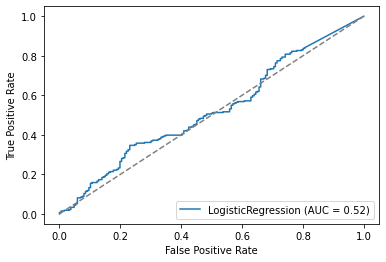

In [36]:

# simple ROC curve for 1 estimator
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
clf = log_reg.fit(X_train, y_train)

plot_roc_curve(clf, X_test, y_test)
x = np.linspace(0, 1.0)
plt.plot(x, x, color='grey', ls='--')
plt.show()

In [38]:
# comparing estimators
# store two log_reg results

# full model
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
clf = log_reg.fit(X_train, y_train)
lr_probs = clf.predict_proba(X_test)

# 1 feature model
log_reg2 = LogisticRegression(solver='lbfgs', max_iter=10000)
X_train2 = X_train[['Google_Search_Volume']] #most informative feature
X_test2 = X_test[['Google_Search_Volume']]
clf2 = log_reg2.fit(X_train2, y_train)
lr_probs2 = clf2.predict_proba(X_test2)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs2 = lr_probs2[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
# summarize scores
print('Full model: ROC AUC=%.3f' % (lr_auc))
print('1 feature: ROC AUC=%.3f' % (lr_auc2))

Full model: ROC AUC=0.524
1 feature: ROC AUC=0.518


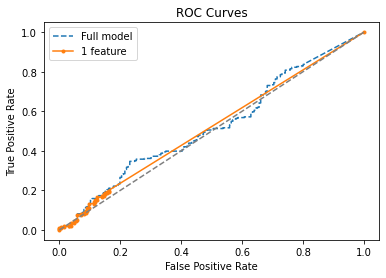

In [39]:
# Plot ROC curves
# get the false positve rates and true positive rates for each model
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
# plot the roc curves for the model
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Full model')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='1 feature')
# plot title
plt.title('ROC Curves')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# add a diagonal line
x = np.linspace(0, 1.0)
plt.plot(x, x, color='grey', ls='--')
# show the plot
plt.show()

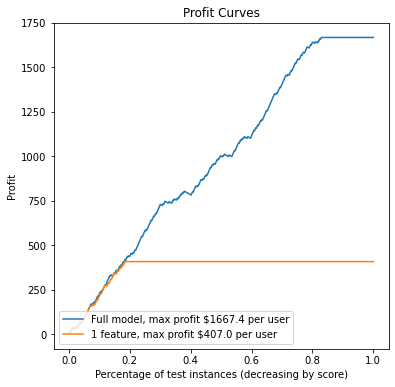

In [41]:
# Get model probability predictions for positive class
# Note: uses models created in prior step and stored under 'clf' and 'clf2'
y_proba = clf.predict_proba(X_test)[:, 1]
y_proba2 = clf2.predict_proba(X_test2)[:, 1]

# Define cost-benefit matrix
# format: [[tn, fp], [fn, tp]]
# 
costbenefit_mat = [[0, -1000], [0, 4000]]
    
# Profit curve data
profits = [] # one profit value for each T (threshold)
# sort probabilities into descending order
thresholds = sorted(y_proba, reverse=True)

# For each threshold, calculate profit - starting with largest threshold
for T in thresholds:
    y_pred = (y_proba > T).astype(int)
    # Calculate confusion matrix for this probability threshold
    #[[tn, fp], [fn, tp]] = confusion_matrix(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    # Calculate total profit for this threshold
    profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
    profits.append(profit)

# Repeat for 2nd model (should put this into a function instead)
profits2 = [] # one profit value for each T (threshold)
thresholds2 = sorted(y_proba2, reverse=True)
for T in thresholds2:
    y_pred2 = (y_proba2 > T).astype(int)
    confusion_mat2 = confusion_matrix(y_test, y_pred2)
    profit2 = sum(sum(confusion_mat2 * costbenefit_mat)) / len(y_test)
    profits2.append(profit2)

# Profit curve plot
model_name = 'Full model'
max_profit = max(profits).round(2)
model_name2 = '1 feature'
max_profit2 = max(profits2).round(2)
plt.figure(figsize=(6, 6))
plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${} per user'.format(model_name, max_profit))
plt.plot(np.linspace(0, 1, len(y_test)), profits2, label = '{}, max profit ${} per user'.format(model_name2, max_profit2))
plt.xlabel('Percentage of test instances (decreasing by score)')
plt.ylabel('Profit')
plt.title('Profit Curves')
plt.legend(loc='lower left')
plt.show()